Text(0.5, 1.0, '테스트')

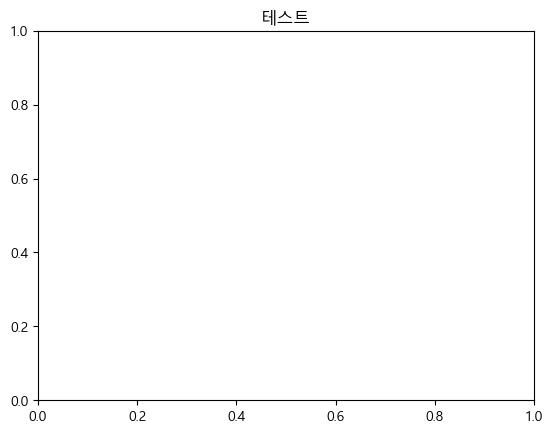

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
plt.title('테스트')

In [2]:
# Data Load
#ov_sec = pd.read_csv('./ov_sec_180.csv', index_col = 0)
#ov_price = pd.read_csv('./ov_price_180.csv', index_col = 0)
#kr_sec = pd.read_csv('./kr_sec_180.csv', index_col = 0)
#kr_price = pd.read_csv('./kr_price_180.csv', index_col = 0)

kr_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/kr_sec_180.csv', index_col = 0)
kr_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/kr_price_180.csv', index_col = 0)
ov_sec = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/ov_sec_180.csv', index_col = 0)
ov_price = pd.read_csv('C:/Users/Administrator/Desktop/비어플_NH/1028/ov_price_180.csv', index_col = 0)

# Sector 별 데이터 생성

In [4]:
# Sector별 종목명 추출
#국내
col_kr = kr_price.columns.to_list()

소재_kr = kr_sec[kr_sec['sector']=='소재']['종목명'].to_list()
col_소재_kr = [x for x in 소재_kr if x in col_kr]
kr_price_소재 = kr_price[col_소재_kr]

정보기술_kr = kr_sec[kr_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_kr = [x for x in 정보기술_kr if x in col_kr]
kr_price_정보 = kr_price[col_정보_kr]

커뮤니케이션서비스_kr = kr_sec[kr_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_kr = [x for x in 커뮤니케이션서비스_kr if x in col_kr]
kr_price_커뮤 = kr_price[col_커뮤_kr]


금융_kr = kr_sec[kr_sec['sector']=='금융']['종목명'].to_list()
col_금융_kr = [x for x in 금융_kr if x in col_kr]
kr_price_금융 = kr_price[col_금융_kr]


산업재_kr = kr_sec[kr_sec['sector']=='산업재']['종목명'].to_list()
col_산업_kr = [x for x in 산업재_kr if x in col_kr]
kr_price_산업 = kr_price[col_산업_kr]


헬스케어_kr = kr_sec[kr_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_kr = [x for x in 헬스케어_kr if x in col_kr]
kr_price_헬스 = kr_price[col_헬스_kr]


#해외
col_ov = ov_price.columns.to_list()

소재_ov = ov_sec[ov_sec['sector']=='소재']['종목명'].to_list()
col_소재_ov = [x for x in 소재_ov if x in col_ov]
ov_price_소재 = ov_price[col_소재_ov]

정보기술_ov = ov_sec[ov_sec['sector']=='정보기술']['종목명'].to_list()
col_정보_ov = [x for x in 정보기술_ov if x in col_ov]
ov_price_정보 = ov_price[col_정보_ov]

커뮤니케이션서비스_ov = ov_sec[ov_sec['sector']=='커뮤니케이션서비스']['종목명'].to_list()
col_커뮤_ov = [x for x in 커뮤니케이션서비스_ov if x in col_ov]
ov_price_커뮤 = ov_price[col_커뮤_ov]


금융_ov = ov_sec[ov_sec['sector']=='금융']['종목명'].to_list()
col_금융_ov = [x for x in 금융_ov if x in col_ov]
ov_price_금융 = ov_price[col_금융_ov]


산업재_ov = ov_sec[ov_sec['sector']=='산업재']['종목명'].to_list()
col_산업_ov = [x for x in 산업재_ov if x in col_ov]
ov_price_산업 = ov_price[col_산업_ov]


헬스케어_ov = ov_sec[ov_sec['sector']=='헬스케어']['종목명'].to_list()
col_헬스_ov = [x for x in 헬스케어_ov if x in col_ov]
ov_price_헬스 = ov_price[col_헬스_ov]

# 네트워크 생성

### Sector 별로 네트워크 생성하므로 좀 더 느슨하게 보기 위해 임계값 0.3으로 조정

In [5]:
def generate_network(df):
    #상관행렬 생성
    stock_per = df.pct_change()
    stock_per = stock_per.iloc[1:,:]
    stock_cor = stock_per.dropna(axis = 1).corr(method = 'pearson')

    # convert matrix to list of edges and rename the columns
    edges = stock_cor.stack().reset_index()
    edges.columns = ["종목_1", "종목_2", "correlation"]

    # remove self correlations
    edges = edges.loc[edges["종목_1"] != edges["종목_2"]].copy()

    # 임계값(+-0.3) 이하 제거
    threshold = 0.3

    # 기본 무방향 그래프 생성
    Gx = nx.from_pandas_edgelist(edges, "종목_1", "종목_2", edge_attr=["correlation"])

    # list to store edges to remove
    remove = []
    # loop through edges in Gx and find correlations which are below the threshold
    for 종목_1, 종목_2 in Gx.edges():
        corr = Gx[종목_1][종목_2]["correlation"]
        # add to remove node list if abs(corr) < threshold
        if abs(corr) < threshold:
            remove.append((종목_1, 종목_2))

    # remove edges contained in the remove list
    Gx.remove_edges_from(remove)
    print(str(len(remove)) + " edges removed")
    return Gx

In [6]:
Gx_kr_소재 = generate_network(kr_price_소재)
Gx_kr_정보 = generate_network(kr_price_정보)
Gx_kr_커뮤 = generate_network(kr_price_커뮤)
Gx_kr_금융 = generate_network(kr_price_금융)
Gx_kr_산업 = generate_network(kr_price_산업)
Gx_kr_헬스 = generate_network(kr_price_헬스)

Gx_ov_소재 = generate_network(ov_price_소재)
Gx_ov_정보 = generate_network(ov_price_정보)
Gx_ov_커뮤 = generate_network(ov_price_커뮤)
Gx_ov_금융 = generate_network(ov_price_금융)
Gx_ov_산업 = generate_network(ov_price_산업)
Gx_ov_헬스 = generate_network(ov_price_헬스)

353 edges removed
328 edges removed
358 edges removed
300 edges removed
369 edges removed
282 edges removed
310 edges removed
61 edges removed
291 edges removed
244 edges removed
180 edges removed
370 edges removed


# Sector 별 중요도 상위 종목 추출

## 중요도 별 상위 종목 추출 함수

**각 중요도 상위 5개 종목 추출**

**각 중요도에서 3번 이상 선정된 종목 추출**

In [7]:
def generate_top(Gx):
    # degree
    degree_dict = nx.degree_centrality(Gx)
    degree = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality'])
    degree.reset_index(inplace=True)
    degree.columns = ['종목명','centrality']

    degree = pd.merge(degree, kr_sec, how = 'left', on = '종목명')

    degree_5 = degree.sort_values(by='centrality', ascending = False).head(5)
    degree_5['centrality'] = 'Degree'

    # closeness
    close_dict = nx.closeness_centrality(Gx)
    close = pd.DataFrame.from_dict(close_dict, orient = 'index', columns = ['centrality'])
    close.reset_index(inplace=True)
    close.columns = ['종목명','centrality']

    close = pd.merge(close, kr_sec, how = 'left', on = '종목명')

    close_5 = close.sort_values(by='centrality', ascending = False).head(5)
    close_5['centrality'] = 'close'

    # beetness
    beet_dict = nx.betweenness_centrality(Gx, normalized=True, endpoints=False, weight = 'weight')
    beet = pd.DataFrame.from_dict(beet_dict, orient = 'index', columns = ['centrality'])
    beet.reset_index(inplace=True)
    beet.columns = ['종목명','centrality']

    beet = pd.merge(beet, kr_sec, how = 'left', on = '종목명')

    beet_5 = beet.sort_values(by='centrality', ascending = False).head(5)
    beet_5['centrality'] = 'beet'

    # eigenness
    eigen_dict = nx.eigenvector_centrality(Gx, weight = 'weight', max_iter=5000)
    eigen = pd.DataFrame.from_dict(eigen_dict, orient = 'index', columns = ['centrality'])
    eigen.reset_index(inplace=True)
    eigen.columns = ['종목명','centrality']

    eigen = pd.merge(eigen, kr_sec, how = 'left', on = '종목명')

    eigen_5 = eigen.sort_values(by='centrality', ascending = False).head(5)
    eigen_5['centrality'] = 'eigen'

    # pagerankness
    pagerank_dict = nx.pagerank(Gx, alpha = .9, max_iter = 1000, weight = 'weight')
    pagerank = pd.DataFrame.from_dict(pagerank_dict, orient = 'index', columns = ['centrality'])
    pagerank.reset_index(inplace=True)
    pagerank.columns = ['종목명','centrality']

    pagerank = pd.merge(pagerank, kr_sec, how = 'left', on = '종목명')

    pagerank_5 = pagerank.sort_values(by='centrality', ascending = False).head(5)
    pagerank_5['centrality'] = 'pagerank'


    #중요도 데이터 Merge
    centrality_5 = pd.merge(degree_5, close_5, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, beet_5, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, eigen_5, how='outer', on = ['종목명','centrality', 'sector'])
    centrality_5 = pd.merge(centrality_5, pagerank_5, how='outer', on = ['종목명','centrality', 'sector'])

    condition = centrality_5['종목명'].value_counts() >= 3
    value_num = centrality_5['종목명'].value_counts()

    top_stocks = value_num[condition].index.to_list()

    return top_stocks

In [8]:
top_stocks_kr_소재 = generate_top(Gx_kr_소재)
top_stocks_kr_정보 = generate_top(Gx_kr_정보)
top_stocks_kr_커뮤 = generate_top(Gx_kr_커뮤)
top_stocks_kr_금융 = generate_top(Gx_kr_금융)
top_stocks_kr_산업 = generate_top(Gx_kr_산업)
top_stocks_kr_헬스 = generate_top(Gx_kr_헬스)

top_stocks_ov_소재 = generate_top(Gx_ov_소재)
top_stocks_ov_정보 = generate_top(Gx_ov_정보)
top_stocks_ov_커뮤 = generate_top(Gx_ov_커뮤)
top_stocks_ov_금융 = generate_top(Gx_ov_금융)
top_stocks_ov_산업 = generate_top(Gx_ov_산업)
top_stocks_ov_헬스 = generate_top(Gx_ov_헬스)

In [9]:
print(f'국내 소재산업 중요 종목 : {top_stocks_kr_소재}\n\n국내 정보산업 중요 종목 : {top_stocks_kr_정보}\n\n국내 커뮤산업 중요 종목 : {top_stocks_kr_커뮤}\n\n국내 금융산업 중요 종목 : {top_stocks_kr_금융}\n\n국내 산업산업 중요 종목 : {top_stocks_kr_산업}\n\n국내 헬스산업 중요 종목 : {top_stocks_kr_헬스}')

국내 소재산업 중요 종목 : ['효성첨단소재', '금호석유', 'LG화학', 'SK이노베이션', '동화기업']

국내 정보산업 중요 종목 : ['대덕전자', '삼성전자', '심텍', 'SK하이닉스', 'LG이노텍']

국내 커뮤산업 중요 종목 : ['다날', '알서포트', '컴투스', '넵튠', '조이시티']

국내 금융산업 중요 종목 : ['기업은행', 'GS', '삼성증권', '미래에셋증권', '삼성카드']

국내 산업산업 중요 종목 : ['삼성에스디에스', '코웨이', '카카오', '강원랜드']

국내 헬스산업 중요 종목 : ['에이비엘바이오', '한미약품', '녹십자', '한올바이오파마']


In [10]:
print(f'해외 소재산업 중요 종목 : {top_stocks_ov_소재}\n\n해외 정보산업 중요 종목 : {top_stocks_ov_정보}\n\n해외 커뮤산업 중요 종목 : {top_stocks_ov_커뮤}\n\n해외 금융산업 중요 종목 : {top_stocks_ov_금융}\n\n해외 산업산업 중요 종목 : {top_stocks_ov_산업}\n\n해외 헬스산업 중요 종목 : {top_stocks_ov_헬스}')

해외 소재산업 중요 종목 : ['KALU', 'UFPI', 'PLL', 'CENX', 'IOSP']

해외 정보산업 중요 종목 : ['ADBE', 'ADSK', 'AAPL', 'CDNS', 'SNPS']

해외 커뮤산업 중요 종목 : ['LBRDK', 'FWONK', 'WBD', 'CMCSA', 'MTCH', 'Z']

해외 금융산업 중요 종목 : ['SEIC', 'TPG', 'PFG', 'FITB', 'CG']

해외 산업산업 중요 종목 : ['POOL', 'MIDD', 'LECO', 'LSTR', 'ODFL']

해외 헬스산업 중요 종목 : ['IDXX', 'ALNY', 'HOLX', 'WBA', 'GILD']


# 국내 시각화

### 소재

In [11]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_소재))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_소재.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_소재.add_nodes_from(col_소재_kr, shape = 'dot')

Gx_kr_소재.add_nodes_from(top_stocks_kr_소재, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_소재)
net.show('Sector_Importance_kr_소재.html')

Sector_Importance_kr_소재.html


In [12]:
net.write_html('Sector_Importance_kr_소재.html')

### 정보

In [13]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_정보))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_정보.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_정보.add_nodes_from(col_정보_kr, shape = 'dot')

Gx_kr_정보.add_nodes_from(top_stocks_kr_정보, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_정보)
net.show('Sector_Importance_kr_정보.html')

Sector_Importance_kr_정보.html


In [14]:
net.write_html('Sector_Importance_kr_정보.html')

### 커뮤

In [15]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_커뮤))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_커뮤.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_커뮤.add_nodes_from(col_커뮤_kr, shape = 'dot')

Gx_kr_커뮤.add_nodes_from(top_stocks_kr_커뮤, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_커뮤)
net.show('Sector_Importance_kr_커뮤.html')

Sector_Importance_kr_커뮤.html


In [16]:
net.write_html('Sector_Importance_kr_커뮤.html')

### 금융

In [17]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_금융))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_금융.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_금융.add_nodes_from(col_금융_kr, shape = 'dot')

Gx_kr_금융.add_nodes_from(top_stocks_kr_금융, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_금융)
net.show('Sector_Importance_kr_금융.html')

Sector_Importance_kr_금융.html


In [18]:
net.write_html('Sector_Importance_kr_금융.html')

### 산업

In [19]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_산업))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_산업.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_산업.add_nodes_from(col_산업_kr, shape = 'dot')

Gx_kr_산업.add_nodes_from(top_stocks_kr_산업, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_산업)
net.show('Sector_Importance_kr_산업.html')

Sector_Importance_kr_산업.html


In [20]:
net.write_html('Sector_Importance_kr_산업.html')

### 헬스 산업

In [21]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_kr_헬스))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_kr_헬스.add_node(stock_list[i], size = nsize[i]*1.1)


Gx_kr_헬스.add_nodes_from(col_헬스_kr, shape = 'dot')

Gx_kr_헬스.add_nodes_from(top_stocks_kr_헬스, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_kr_헬스)
net.show('Sector_Importance_kr_헬스.html')

Sector_Importance_kr_헬스.html


In [22]:
net.write_html('Sector_Importance_kr_헬스.html')

# 해외

### 소재

In [23]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_소재))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_소재.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_소재.add_nodes_from(col_소재_ov, shape = 'dot')

Gx_ov_소재.add_nodes_from(top_stocks_ov_소재, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_소재)
net.show('Sector_Importance_ov_소재.html')

Sector_Importance_ov_소재.html


In [24]:
net.write_html('Sector_Importance_ov_소재.html')

### 정보

In [25]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_정보))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_정보.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_정보.add_nodes_from(col_정보_ov, shape = 'dot')

Gx_ov_정보.add_nodes_from(top_stocks_ov_정보, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_정보)
net.show('Sector_Importance_ov_정보.html')

Sector_Importance_ov_정보.html


In [26]:
net.write_html('Sector_Importance_ov_정보.html')

### 커뮤

In [27]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_커뮤))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_커뮤.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_커뮤.add_nodes_from(col_커뮤_ov, shape = 'dot')

Gx_ov_커뮤.add_nodes_from(top_stocks_ov_커뮤, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_커뮤)
net.show('Sector_Importance_ov_커뮤.html')

Sector_Importance_ov_커뮤.html


In [28]:
net.write_html('Sector_Importance_ov_커뮤.html')

### 금융

In [29]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_금융))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_금융.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_금융.add_nodes_from(col_금융_ov, shape = 'dot')

Gx_ov_금융.add_nodes_from(top_stocks_ov_금융, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_금융)
net.show('Sector_Importance_ov_금융.html')

Sector_Importance_ov_금융.html


In [30]:
net.write_html('Sector_Importance_ov_금융.html')

### 산업

In [31]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_산업))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_산업.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_산업.add_nodes_from(col_산업_ov, shape = 'dot')

Gx_ov_산업.add_nodes_from(top_stocks_ov_산업, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_산업)
net.show('Sector_Importance_ov_산업.html')

Sector_Importance_ov_산업.html


In [32]:
net.write_html('Sector_Importance_ov_산업.html')

### 헬스

In [33]:
# 노드 사이즈 지정
degree_dict = dict(nx.degree(Gx_ov_헬스))
nsize = np.array([v for v in degree_dict.values()])
stock_list = np.array([v for v in degree_dict.keys()])

for i, j in enumerate(nsize):
    Gx_ov_헬스.add_node(stock_list[i], size = nsize[i]*.5)


Gx_ov_헬스.add_nodes_from(col_헬스_ov, shape = 'dot')

Gx_ov_헬스.add_nodes_from(top_stocks_ov_헬스, shape = 'star', color = 'yellow', size = 20)

net = Network(notebook = True, width = '1200px', height = '1000px',
             bgcolor = '#222222', font_color = 'white')

net.repulsion(node_distance = 100, central_gravity = .01)
net.from_nx(Gx_ov_헬스)
net.show('Sector_Importance_ov_헬스.html')

Sector_Importance_ov_헬스.html


In [34]:
net.write_html('Sector_Importance_ov_헬스.html')